# Plot 1xs result as a function for PhT, for different z(in one plot, separate by color and offset) per Q2 bins, for one phih bin(-Pi to Pi), so there are lots of PhT bins

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import lhapdf


In [2]:

def Get_weighted_average(value,error):
    Factor=(0.3894*1e6)
    sum_mean = 0
    sum_sigma = 0
    #print(value,error)
    for i in range(len(value)):
        #print(i,value[i],error[i])
        sum_mean += Factor*value[i]/((Factor)**2*error[i]**2)
        sum_sigma += 1/(Factor**2*error[i]**2)
    if sum_sigma!=0:
        return sum_mean/sum_sigma,math.sqrt(1/sum_sigma)
    else:
        return -1,0
def Get_weighted_average_phi(value,error):
    sum_mean = 0
    sum_sigma = 0
    #print(value,error)
    for i in range(len(value)):
        #print(i,value[i],error[i])
        sum_mean += value[i]/(error[i]*error[i])
        sum_sigma += 1/(error[i]*error[i])
    if sum_sigma!=0:
        return sum_mean/sum_sigma,math.sqrt(1/sum_sigma)
    else:
        return -1,0

In [3]:

#for pip
df_3xs_x1_zQ2xbjPhT = pd.read_csv('Materials/results_June2024/onephi_Sep/simenhancedpip_22GeV_He3.dat',delim_whitespace=True)
df_3xs_x1_zQ2xbjPhT.head()

,i,Ebeam,x,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
0,0,22.0,0.051616,0.836615,0.315489,1.778169,0.697595,FUUT,0.001743,0.000413,0.0,0.0,He3,pi+,solid,0.000413
1,1,22.0,0.047162,0.859863,0.318046,1.668100,0.768185,FUUT,0.001064,0.000467,0.0,0.0,He3,pi+,solid,0.000467
2,2,22.0,0.045101,0.871285,0.318902,1.614957,0.803865,FUUT,0.000812,0.000503,0.0,0.0,He3,pi+,solid,0.000503
3,3,22.0,0.043484,0.880571,0.319760,1.572561,0.837869,FUUT,0.000616,0.000417,0.0,0.0,He3,pi+,solid,0.000417
4,4,22.0,0.042156,0.888100,0.320816,1.536647,0.874105,FUUT,0.000449,0.000439,0.0,0.0,He3,pi+,solid,0.000439


In [4]:
PI = math.pi
print(PI)
#z_cuts=[0.3,0.4,0.5,0.6]
z_cuts=[0.3,0.35,0.4,0.5,0.6,0.7]
#Q2_cuts=[1,2,3,4,5]
Q2_cuts=[2,4,6,10,20]
xbj_cuts=[0,0.25]

#PhT_cuts=[0,0.1,0.2,0.3,0.4,0.6,0.8,1.6]
PhT_cuts=[0,0.4,0.45,0.5,0.55,0.6,0.7,0.8,1.6]
df_3xs_zQ2=df_3xs_x1_zQ2xbjPhT[(df_3xs_x1_zQ2xbjPhT['Ebeam']==22)&(df_3xs_x1_zQ2xbjPhT['x']>xbj_cuts[0])&(df_3xs_x1_zQ2xbjPhT['x']<xbj_cuts[1])]


3.141592653589793


     i  Ebeam         x         y         z        Q2        pT   obs   
18  18   22.0  0.150632  0.616036  0.320000  3.824552  0.274032  FUUT  \
19  19   22.0  0.143264  0.634506  0.320710  3.743381  0.329952  FUUT   
20  20   22.0  0.139294  0.644787  0.320818  3.695505  0.361403  FUUT   
21  21   22.0  0.136485  0.652240  0.320898  3.660279  0.384422  FUUT   
22  22   22.0  0.134304  0.658176  0.321034  3.632336  0.402264  FUUT   

       value      stat  systrel  systabs target hadron Experiment     error  
18  0.004813  0.000464      0.0      0.0    He3    pi+      solid  0.000464  
19  0.004078  0.000429      0.0      0.0    He3    pi+      solid  0.000429  
20  0.003670  0.000432      0.0      0.0    He3    pi+      solid  0.000432  
21  0.003374  0.000430      0.0      0.0    He3    pi+      solid  0.000430  
22  0.003148  0.000464      0.0      0.0    He3    pi+      solid  0.000464  
67
37
36
15
7


Text(0, 0.5, '${d \\bf{\\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]')

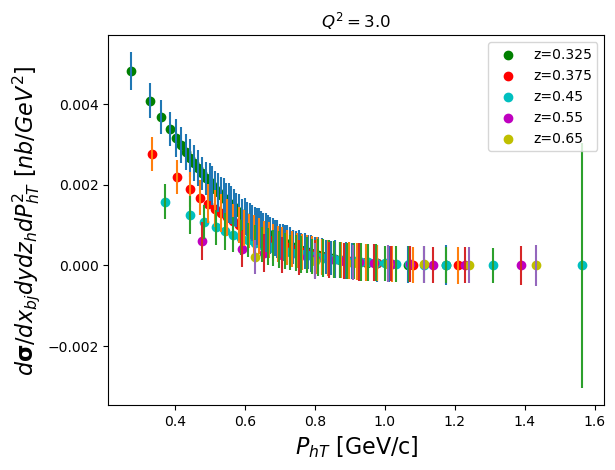

In [5]:
#plot for the Q2 bins
i_Q2=1

df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
print(df_3xs_z.head())
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
for i_z in range(1,len(z_cuts)):
    #print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus=df_3xs['value'].to_list()
    Fuu_stats=df_3xs['stat'].to_list()
    pTs=df_3xs['pT'].to_list()
    
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)


8
8
8
8
8


Text(0, 0.5, '${d \\bf{\\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]')

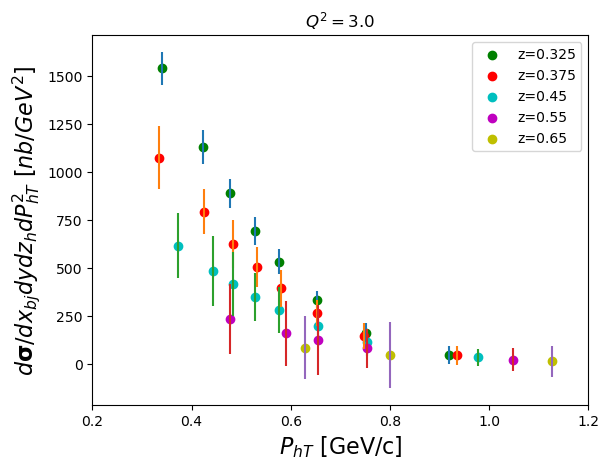

In [6]:
#plot for the Q2 bins
i_Q2=1
#file=open('Materials/results_June2024/onephi/numbers.txt','w')
#file.write('i,Ebeam,x,xl,xr,phih,phihl,phihr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
i_counts=0
for i_z in range(1,len(z_cuts)):
    #print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus=[]
    Fuu_stats=[]
    pTs=[]
    for i_PhT in range(1,len(PhT_cuts)):
        df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
        #print(len(df_3xs_PhT))
        
        _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
        _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _sys = _Fuu*0.1
        #_target=df_3xs_PhT['target'].tolist()[0]
        #_hadron=df_3xs_PhT['hadron'].tolist()[0]
        #file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.3f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_phih,-math.pi,math.pi,_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
        #print(_pT)
        Fuus.append(_Fuu)
        Fuu_stats.append(_Fuu_stat)
        pTs.append(_pT)
        i_counts+=1
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])

plt.xlim(0.2,1.2)
plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)

#file.close()

     i  Ebeam         x         y         z        Q2        pT   obs   
18  18   22.0  0.150632  0.616036  0.320000  3.824552  0.274032  FUUT  \
19  19   22.0  0.143264  0.634506  0.320710  3.743381  0.329952  FUUT   
20  20   22.0  0.139294  0.644787  0.320818  3.695505  0.361403  FUUT   
21  21   22.0  0.136485  0.652240  0.320898  3.660279  0.384422  FUUT   
22  22   22.0  0.134304  0.658176  0.321034  3.632336  0.402264  FUUT   

       value      stat  systrel  systabs target hadron Experiment     error  
18  0.004813  0.000464      0.0      0.0    He3    pi+      solid  0.000464  
19  0.004078  0.000429      0.0      0.0    He3    pi+      solid  0.000429  
20  0.003670  0.000432      0.0      0.0    He3    pi+      solid  0.000432  
21  0.003374  0.000430      0.0      0.0    He3    pi+      solid  0.000430  
22  0.003148  0.000464      0.0      0.0    He3    pi+      solid  0.000464  
       i  Ebeam         x         y         z        Q2        pT   obs   
180  180   22.0  0

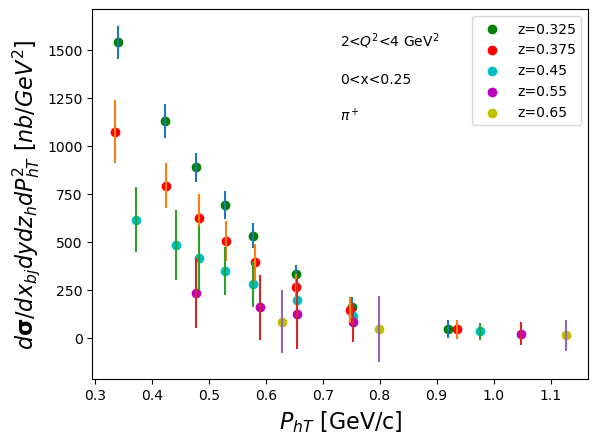

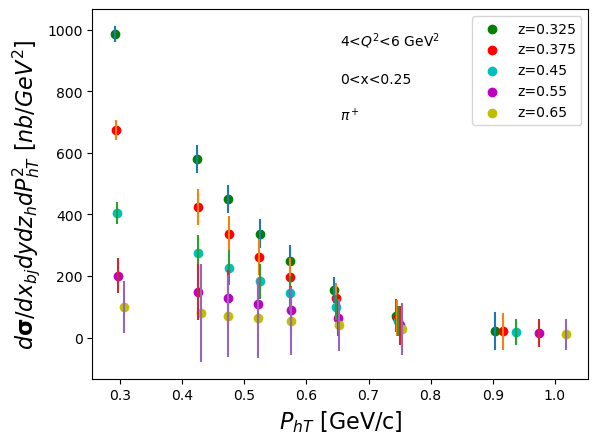

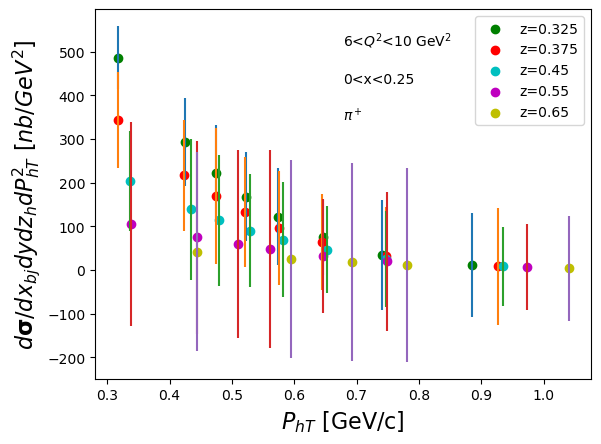

In [7]:
#plot for the Q2 bins
file=open('Materials/results_June2024/onephi_Sep/numbers_x1_pip_22_He3.txt','w')
file.write('i,Ebeam,x,xl,xr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
i_counts=0
for i_Q2 in range(1,len(Q2_cuts)-1):
    plt.figure()
    df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
    #factor_zs=[10,9,8,7,6,5,4,3,2,1]
    color=['b','g','r','c','m','y','navy','purple']
    print(df_3xs_z.head())
    for i_z in range(1,len(z_cuts)):
        #print(z_cuts[i_z])
        df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
        #print(len(df_3xs))
        Fuus=[]
        Fuu_stats=[]
        pTs=[]
        for i_PhT in range(1,len(PhT_cuts)):
            df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
            #print(len(df_3xs_PhT))
        
            _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
            _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _sys = _Fuu*0.1
            if _Fuu!=-1:
                _Ebeam=df_3xs_PhT['Ebeam'].tolist()[0]
                _target=df_3xs_PhT['target'].tolist()[0]
                _hadron=df_3xs_PhT['hadron'].tolist()[0]
                file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,_Ebeam,_x,xbj_cuts[0],xbj_cuts[1],_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
                #print(_pT)
                Fuus.append(_Fuu)
                Fuu_stats.append(_Fuu_stat)
                pTs.append(_pT)
                i_counts+=1
        legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
        plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
        #print(len(pTs))
        plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
    plt.legend()
    #plt.yscale('log')
    #plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
    plt.text(.5,.9,f'{Q2_cuts[i_Q2-1]}<$Q^2$<{Q2_cuts[i_Q2]} GeV$^2$',transform=plt.gca().transAxes)
    plt.text(.5,.8,f'{xbj_cuts[0]}<x<{xbj_cuts[1]}',transform=plt.gca().transAxes)
    plt.text(.5,.7,'$\pi^+$',transform=plt.gca().transAxes)
    plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
    plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
    
    plt.savefig('../Unpol_proposal/Materials/results_June2024/onephi_Sep/FuuA_Pt_'+str(i_Q2)+'_22_pip.pdf')
file.close()

In [8]:
#for pip,  x2
xbj_cuts=[0.25,0.5]
Q2_cuts=[2,4,6,10,20]
df_3xs_zQ2=df_3xs_x1_zQ2xbjPhT[(df_3xs_x1_zQ2xbjPhT['Ebeam']==22)&(df_3xs_x1_zQ2xbjPhT['x']>xbj_cuts[0])&(df_3xs_x1_zQ2xbjPhT['x']<xbj_cuts[1])]
df_3xs_zQ2.head()
PhT_cuts=[0,0.1,0.2,0.3,0.4,0.6,0.8,1.6]

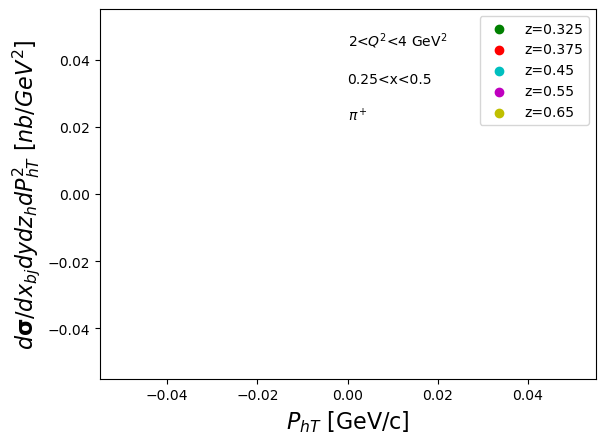

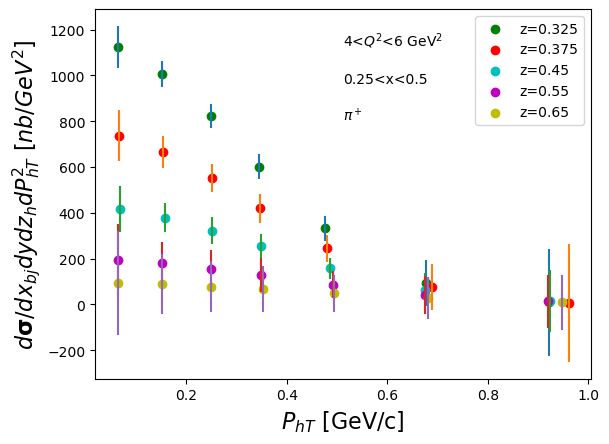

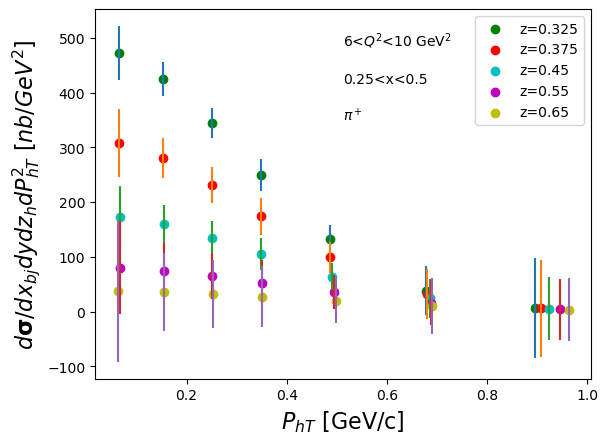

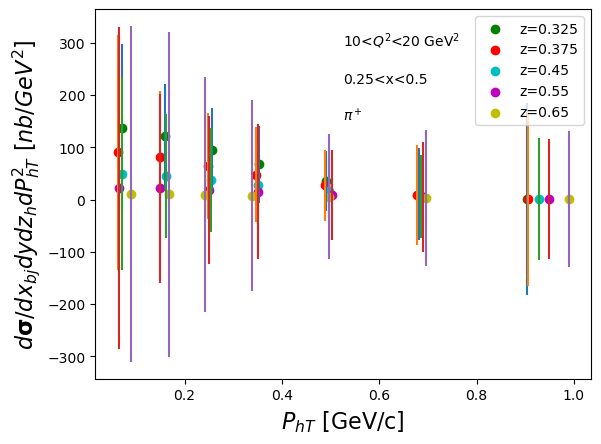

In [9]:
#plot for the Q2 bins
file=open('Materials/results_June2024/onephi_Sep/numbers_x2_pip_22_He3.txt','w')
file.write('i,Ebeam,x,xl,xr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
i_counts=0
for i_Q2 in range(1,len(Q2_cuts)):
    plt.figure()
    df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
    #factor_zs=[10,9,8,7,6,5,4,3,2,1]
    color=['b','g','r','c','m','y','navy','purple']

    for i_z in range(1,len(z_cuts)):
        #print(z_cuts[i_z])
        df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
        #print(len(df_3xs))
        Fuus=[]
        Fuu_stats=[]
        pTs=[]
        for i_PhT in range(1,len(PhT_cuts)):
            df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
            #print(len(df_3xs_PhT))
            #print(len(df_3xs_PhT))
            if len(df_3xs_PhT)>0:
                
                _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
                _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _sys = _Fuu*0.1
                _Ebeam=df_3xs_PhT['Ebeam'].tolist()[0]
                _target=df_3xs_PhT['target'].tolist()[0]
                _hadron=df_3xs_PhT['hadron'].tolist()[0]
                file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,_Ebeam,_x,xbj_cuts[0],xbj_cuts[1],_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
                #print(_pT)
                Fuus.append(_Fuu)
                Fuu_stats.append(_Fuu_stat)
                pTs.append(_pT)
                i_counts+=1
        legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
        plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
        #print(len(pTs))
        plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
    plt.legend()
    #plt.yscale('log')
    #plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
    plt.text(.5,.9,f'{Q2_cuts[i_Q2-1]}<$Q^2$<{Q2_cuts[i_Q2]} GeV$^2$',transform=plt.gca().transAxes)
    plt.text(.5,.8,f'{xbj_cuts[0]}<x<{xbj_cuts[1]}',transform=plt.gca().transAxes)
    plt.text(.5,.7,'$\pi^+$',transform=plt.gca().transAxes)
    plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
    plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
    plt.savefig('../Unpol_proposal/Materials/results_June2024/onephi_Sep/FuuA_Pt_x2_'+str(i_Q2)+'_22_pip.pdf')
file.close()

In [10]:
#for pip,  x3
xbj_cuts=[0.5,0.7]
Q2_cuts=[2,4,6,10,20]
df_3xs_zQ2=df_3xs_x1_zQ2xbjPhT[(df_3xs_x1_zQ2xbjPhT['Ebeam']==22)&(df_3xs_x1_zQ2xbjPhT['x']>xbj_cuts[0])&(df_3xs_x1_zQ2xbjPhT['x']<xbj_cuts[1])]
df_3xs_zQ2.head()
PhT_cuts=[0,0.1,0.2,0.3,0.4,0.6,0.8,1.6]

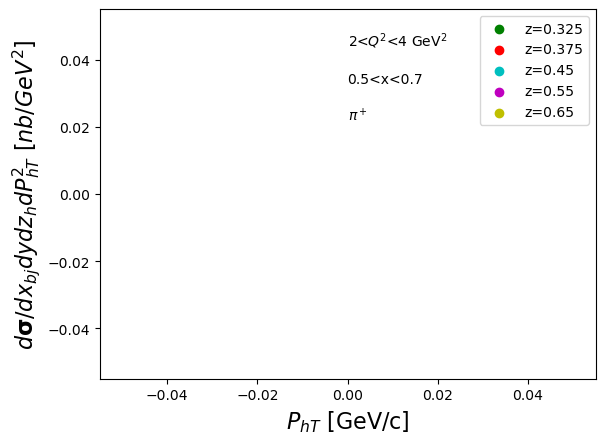

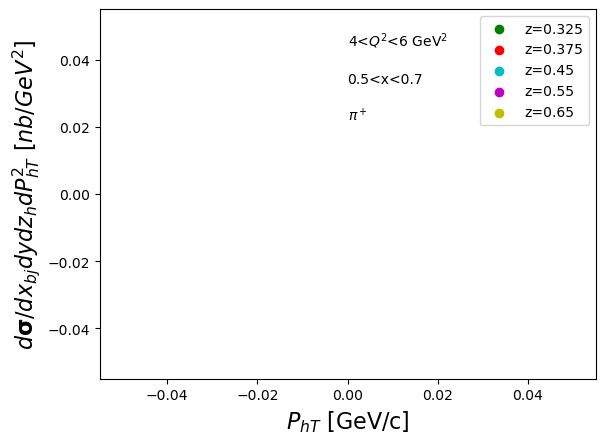

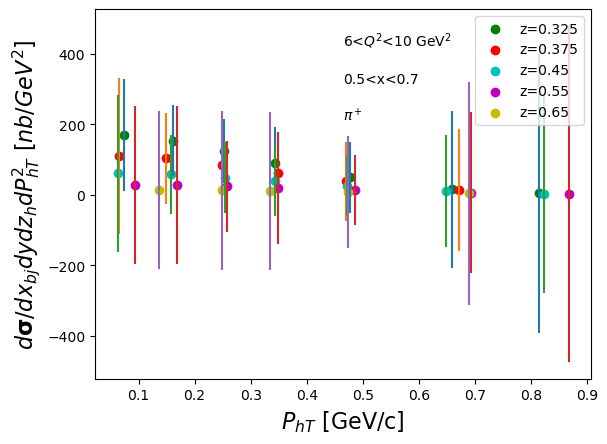

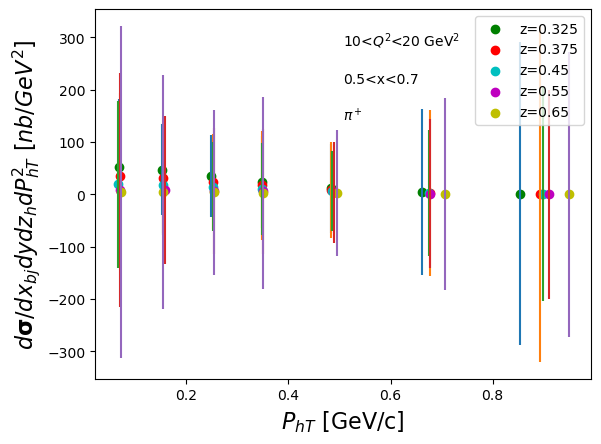

In [11]:
#plot for the Q2 bins
file=open('Materials/results_June2024/onephi_Sep/numbers_x3_pip_22_He3.txt','w')
file.write('i,Ebeam,x,xl,xr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
i_counts=0
for i_Q2 in range(1,len(Q2_cuts)):
    plt.figure()
    df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
    #factor_zs=[10,9,8,7,6,5,4,3,2,1]
    color=['b','g','r','c','m','y','navy','purple']

    for i_z in range(1,len(z_cuts)):
        #print(z_cuts[i_z])
        df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
        #print(len(df_3xs))
        Fuus=[]
        Fuu_stats=[]
        pTs=[]
        for i_PhT in range(1,len(PhT_cuts)):
            df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
            #print(len(df_3xs_PhT))
            #print(len(df_3xs_PhT))
            if len(df_3xs_PhT)>0:
                
                _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
                _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _sys = _Fuu*0.1
                _Ebeam=df_3xs_PhT['Ebeam'].tolist()[0]
                _target=df_3xs_PhT['target'].tolist()[0]
                _hadron=df_3xs_PhT['hadron'].tolist()[0]
                file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,_Ebeam,_x,xbj_cuts[0],xbj_cuts[1],_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
                #print(_pT)
                Fuus.append(_Fuu)
                Fuu_stats.append(_Fuu_stat)
                pTs.append(_pT)
                i_counts+=1
        legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
        plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
        #print(len(pTs))
        plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
    plt.legend()
    #plt.yscale('log')
    #plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
    plt.text(.5,.9,f'{Q2_cuts[i_Q2-1]}<$Q^2$<{Q2_cuts[i_Q2]} GeV$^2$',transform=plt.gca().transAxes)
    plt.text(.5,.8,f'{xbj_cuts[0]}<x<{xbj_cuts[1]}',transform=plt.gca().transAxes)
    plt.text(.5,.7,'$\pi^+$',transform=plt.gca().transAxes)
    plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
    plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
    plt.savefig('../Unpol_proposal/Materials/results_June2024/onephi_Sep/FuuA_Pt_x3_'+str(i_Q2)+'_22_pip.pdf')
file.close()

In [12]:
#For Pi-

In [13]:
#for pim

df_3xs_x1_zQ2xbjPhT = pd.read_csv('Materials/results_June2024/onephi_Sep/simenhancedpim_22GeV_He3.dat',delim_whitespace=True)
df_3xs_x1_zQ2xbjPhT.head()

,i,Ebeam,x,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
0,0,22.0,0.051472,0.837345,0.315264,1.774797,0.695148,FUUT,0.001454,0.000491,0.0,0.0,He3,pi-,solid,0.000491
1,1,22.0,0.046821,0.861169,0.317679,1.658177,0.769329,FUUT,0.000873,0.000444,0.0,0.0,He3,pi-,solid,0.000444
2,2,22.0,0.044248,0.875347,0.318879,1.591432,0.817085,FUUT,0.000606,0.000456,0.0,0.0,He3,pi-,solid,0.000456
3,3,22.0,0.042725,0.884647,0.320121,1.551865,0.857104,FUUT,0.000431,0.000458,0.0,0.0,He3,pi-,solid,0.000458
4,4,22.0,0.041559,0.891409,0.321275,1.520365,0.897846,FUUT,0.000297,0.000441,0.0,0.0,He3,pi-,solid,0.000441


In [14]:
PI = math.pi
print(PI)
#z_cuts=[0.3,0.4,0.5,0.6]
z_cuts=[0.3,0.35,0.4,0.5,0.6,0.7]
#Q2_cuts=[1,2,3,4,5]
Q2_cuts=[2,4,6,10,20]
xbj_cuts=[0,0.25]

#PhT_cuts=[0,0.1,0.2,0.3,0.4,0.6,0.8,1.6]
PhT_cuts=[0,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.7,0.8,1.6]
df_3xs_zQ2=df_3xs_x1_zQ2xbjPhT[(df_3xs_x1_zQ2xbjPhT['Ebeam']==22)&(df_3xs_x1_zQ2xbjPhT['x']>xbj_cuts[0])&(df_3xs_x1_zQ2xbjPhT['x']<xbj_cuts[1])]


3.141592653589793


51
27
25
10
5


Text(0, 0.5, '${d \\bf{\\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]')

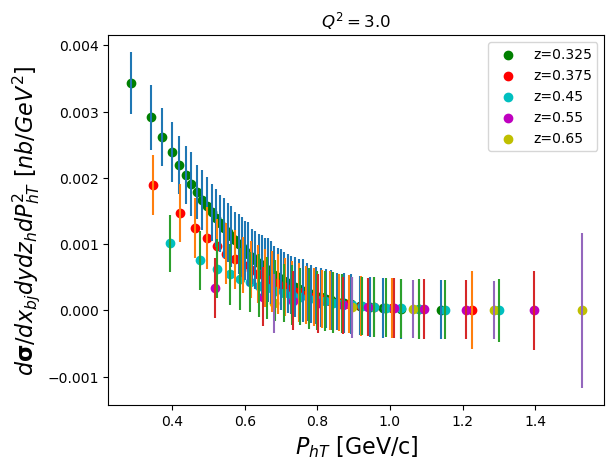

In [15]:
#plot for the Q2 bins
i_Q2=1

df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
for i_z in range(1,len(z_cuts)):
    #print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus=df_3xs['value'].to_list()
    Fuu_stats=df_3xs['stat'].to_list()
    pTs=df_3xs['pT'].to_list()
    
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)


14
14
14
14
14


Text(0, 0.5, '${d \\bf{\\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]')

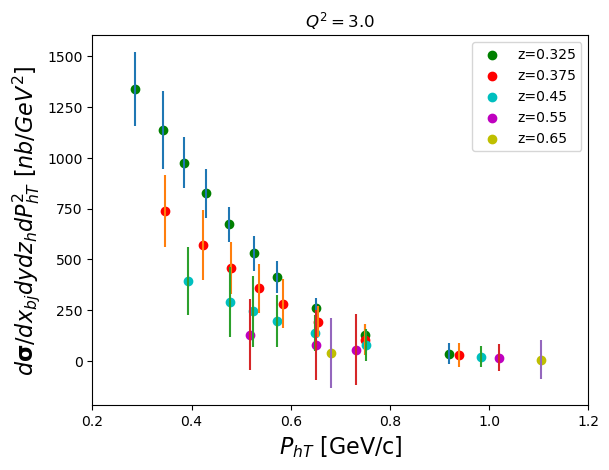

In [16]:
#plot for the Q2 bins
i_Q2=1
#file=open('Materials/results_June2024/onephi/numbers.txt','w')
#file.write('i,Ebeam,x,xl,xr,phih,phihl,phihr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
i_counts=0
for i_z in range(1,len(z_cuts)):
    #print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus=[]
    Fuu_stats=[]
    pTs=[]
    for i_PhT in range(1,len(PhT_cuts)):
        df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
        #print(len(df_3xs_PhT))
        
        _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
        _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _sys = _Fuu*0.1
        #_target=df_3xs_PhT['target'].tolist()[0]
        #_hadron=df_3xs_PhT['hadron'].tolist()[0]
        #file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.3f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_phih,-math.pi,math.pi,_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
        #print(_pT)
        Fuus.append(_Fuu)
        Fuu_stats.append(_Fuu_stat)
        pTs.append(_pT)
        i_counts+=1
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
plt.legend()
plt.xlim(0.2,1.2)
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)

#file.close()

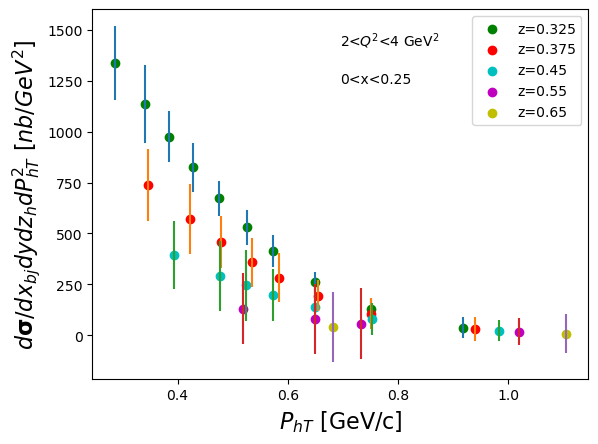

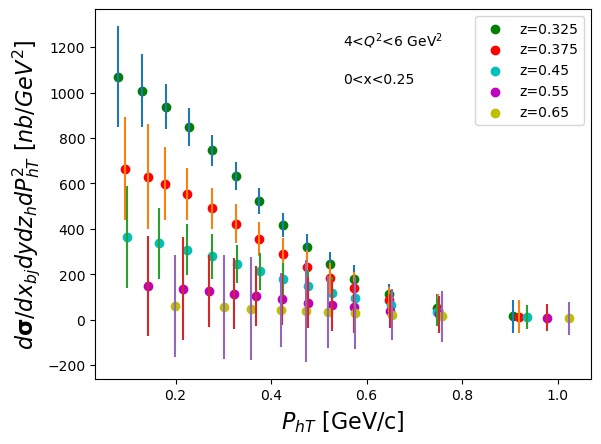

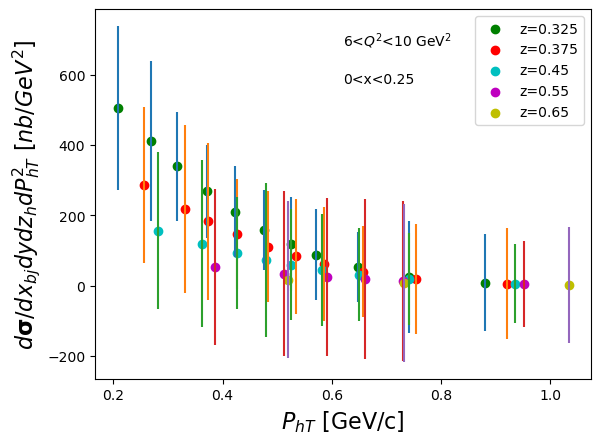

In [17]:
#plot for the Q2 bins
file=open('Materials/results_June2024/onephi_Sep/numbers_x1_pim_22_He3.txt','w')
file.write('i,Ebeam,x,xl,xr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
i_counts=0
for i_Q2 in range(1,len(Q2_cuts)-1):
    plt.figure()
    df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
    #factor_zs=[10,9,8,7,6,5,4,3,2,1]
    color=['b','g','r','c','m','y','navy','purple']

    for i_z in range(1,len(z_cuts)):
        #print(z_cuts[i_z])
        df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
        #print(len(df_3xs))
        Fuus=[]
        Fuu_stats=[]
        pTs=[]
        for i_PhT in range(1,len(PhT_cuts)):
            df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
            #print(len(df_3xs_PhT))
        
            _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
            _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _sys = _Fuu*0.1
            if _Fuu!=-1:
                _Ebeam=df_3xs_PhT['Ebeam'].tolist()[0]
                _target=df_3xs_PhT['target'].tolist()[0]
                _hadron=df_3xs_PhT['hadron'].tolist()[0]
                file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,_Ebeam,_x,xbj_cuts[0],xbj_cuts[1],_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
                #print(_pT)
                Fuus.append(_Fuu)
                Fuu_stats.append(_Fuu_stat)
                pTs.append(_pT)
                i_counts+=1
        legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
        plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
        #print(len(pTs))
        plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
    plt.legend()
    #plt.yscale('log')
    #plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
    plt.text(.5,.9,f'{Q2_cuts[i_Q2-1]}<$Q^2$<{Q2_cuts[i_Q2]} GeV$^2$',transform=plt.gca().transAxes)
    plt.text(.5,.8,f'{xbj_cuts[0]}<x<{xbj_cuts[1]}',transform=plt.gca().transAxes)
    plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
    plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
    
    plt.savefig('../Unpol_proposal/Materials/results_June2024/onephi_Sep/FuuA_Pt_'+str(i_Q2)+'_22_pim.pdf')
file.close()

In [18]:
#for pi- x2
xbj_cuts=[0.25,0.5]
Q2_cuts=[2,4,6,10,20]
df_3xs_zQ2=df_3xs_x1_zQ2xbjPhT[(df_3xs_x1_zQ2xbjPhT['Ebeam']==22)&(df_3xs_x1_zQ2xbjPhT['x']>xbj_cuts[0])&(df_3xs_x1_zQ2xbjPhT['x']<xbj_cuts[1])]
df_3xs_zQ2.head()
PhT_cuts=[0,0.1,0.2,0.3,0.4,0.6,0.8,1.6]

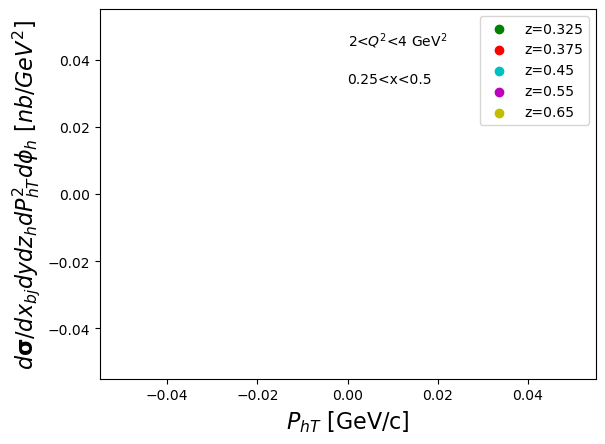

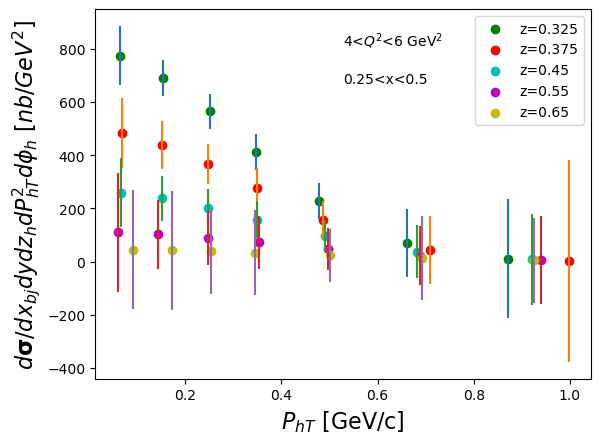

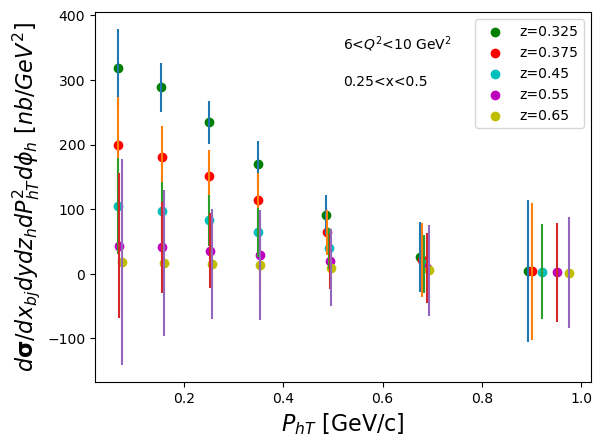

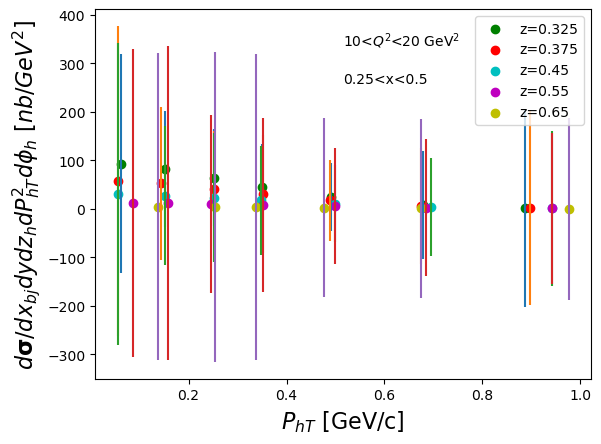

In [19]:
#plot for the Q2 bins
file=open('Materials/results_June2024/onephi_Sep/numbers_x2_pim_22_He3.txt','w')
file.write('i,Ebeam,x,xl,xr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
i_counts=0
for i_Q2 in range(1,len(Q2_cuts)):
    plt.figure()
    df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
    #factor_zs=[10,9,8,7,6,5,4,3,2,1]
    color=['b','g','r','c','m','y','navy','purple']

    for i_z in range(1,len(z_cuts)):
        #print(z_cuts[i_z])
        df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
        #print(len(df_3xs))
        Fuus=[]
        Fuu_stats=[]
        pTs=[]
        for i_PhT in range(1,len(PhT_cuts)):
            df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
            #print(len(df_3xs_PhT))
            #print(len(df_3xs_PhT))
            if len(df_3xs_PhT)>0:
                
                _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
                _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _sys = _Fuu*0.1
                _Ebeam=df_3xs_PhT['Ebeam'].tolist()[0]
                _target=df_3xs_PhT['target'].tolist()[0]
                _hadron=df_3xs_PhT['hadron'].tolist()[0]
                file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,_Ebeam,_x,xbj_cuts[0],xbj_cuts[1],_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
                #print(_pT)
                Fuus.append(_Fuu)
                Fuu_stats.append(_Fuu_stat)
                pTs.append(_pT)
                i_counts+=1
        legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
        plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
        #print(len(pTs))
        plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
    plt.legend()
    #plt.yscale('log')
    #plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
    plt.text(.5,.9,f'{Q2_cuts[i_Q2-1]}<$Q^2$<{Q2_cuts[i_Q2]} GeV$^2$',transform=plt.gca().transAxes)
    plt.text(.5,.8,f'{xbj_cuts[0]}<x<{xbj_cuts[1]}',transform=plt.gca().transAxes)
    plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
    plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}d\phi_h}$ [$nb/GeV^2$]',fontsize=16)
    plt.savefig('../Unpol_proposal/Materials/results_June2024/onephi_Sep/FuuA_Pt_x2_'+str(i_Q2)+'_22_pim.pdf')
file.close()

In [20]:
#for pi- x3
xbj_cuts=[0.5,0.7]
Q2_cuts=[2,4,6,10,20]
df_3xs_zQ2=df_3xs_x1_zQ2xbjPhT[(df_3xs_x1_zQ2xbjPhT['Ebeam']==22)&(df_3xs_x1_zQ2xbjPhT['x']>xbj_cuts[0])&(df_3xs_x1_zQ2xbjPhT['x']<xbj_cuts[1])]
df_3xs_zQ2.head()
PhT_cuts=[0,0.1,0.2,0.3,0.4,0.6,0.8,1.6]

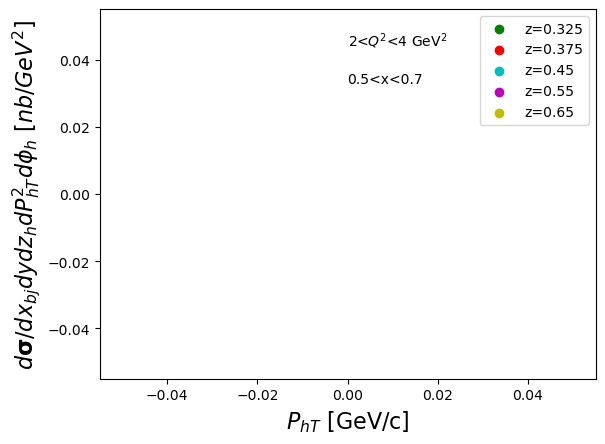

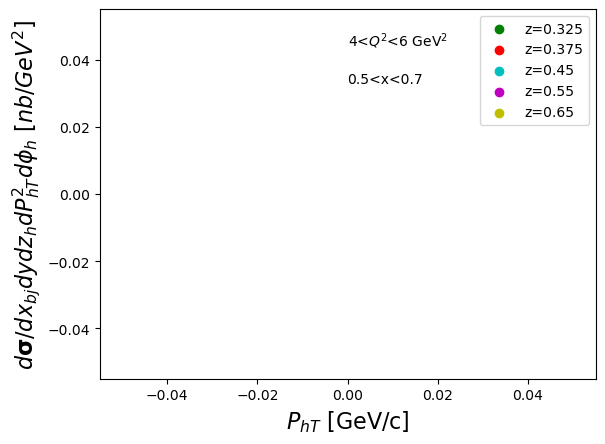

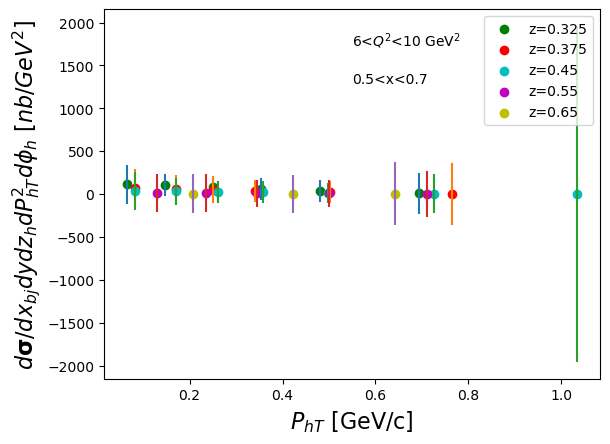

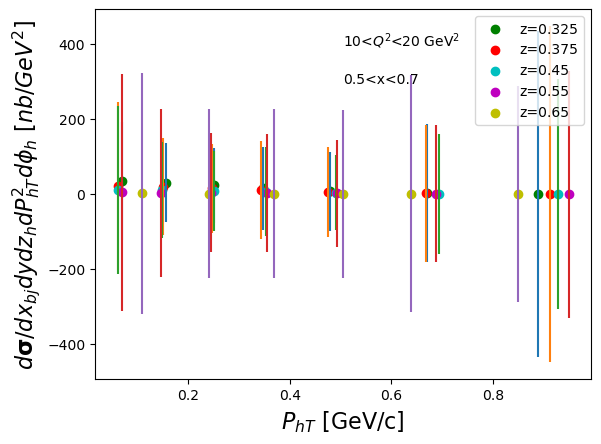

In [21]:
#plot for the Q2 bins
file=open('Materials/results_June2024/onephi_Sep/numbers_x3_pim_22_He3.txt','w')
file.write('i,Ebeam,x,xl,xr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
i_counts=0
for i_Q2 in range(1,len(Q2_cuts)):
    plt.figure()
    df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
    #factor_zs=[10,9,8,7,6,5,4,3,2,1]
    color=['b','g','r','c','m','y','navy','purple']

    for i_z in range(1,len(z_cuts)):
        #print(z_cuts[i_z])
        df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
        #print(len(df_3xs))
        Fuus=[]
        Fuu_stats=[]
        pTs=[]
        for i_PhT in range(1,len(PhT_cuts)):
            df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
            #print(len(df_3xs_PhT))
            #print(len(df_3xs_PhT))
            if len(df_3xs_PhT)>0:
                
                _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
                _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _sys = _Fuu*0.1
                _Ebeam=df_3xs_PhT['Ebeam'].tolist()[0]
                _target=df_3xs_PhT['target'].tolist()[0]
                _hadron=df_3xs_PhT['hadron'].tolist()[0]
                file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,_Ebeam,_x,xbj_cuts[0],xbj_cuts[1],_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
                #print(_pT)
                Fuus.append(_Fuu)
                Fuu_stats.append(_Fuu_stat)
                pTs.append(_pT)
                i_counts+=1
        legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
        plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
        #print(len(pTs))
        plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
    plt.legend()
    #plt.yscale('log')
    #plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
    plt.text(.5,.9,f'{Q2_cuts[i_Q2-1]}<$Q^2$<{Q2_cuts[i_Q2]} GeV$^2$',transform=plt.gca().transAxes)
    plt.text(.5,.8,f'{xbj_cuts[0]}<x<{xbj_cuts[1]}',transform=plt.gca().transAxes)
    plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
    plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}d\phi_h}$ [$nb/GeV^2$]',fontsize=16)
    plt.savefig('../Unpol_proposal/Materials/results_June2024/onephi_Sep/FuuA_Pt_x3_'+str(i_Q2)+'_22_pim.pdf')
file.close()